### Time Series Workshop 
# 1. Introduction

In [1]:
%config InlineBackend.figure_format='retina'
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

DATA_DIR = Path("..") / Path("data")

## What are time series?
* Time series are data points indexed in time order.
* Time series data are a collection of observations obtained through repeated measurements over time.

## Toy example - Sunspot Data
* Monthly counts of sunspots from mit 18th century to present
* Univariate time series
* Strong periodicity of 11 year cycle (actually 22y)
* No dominant trend

,sunspot_number
date,
1749-01,96.7
1749-02,104.3
1749-03,116.7
1749-04,92.8
1749-05,141.7


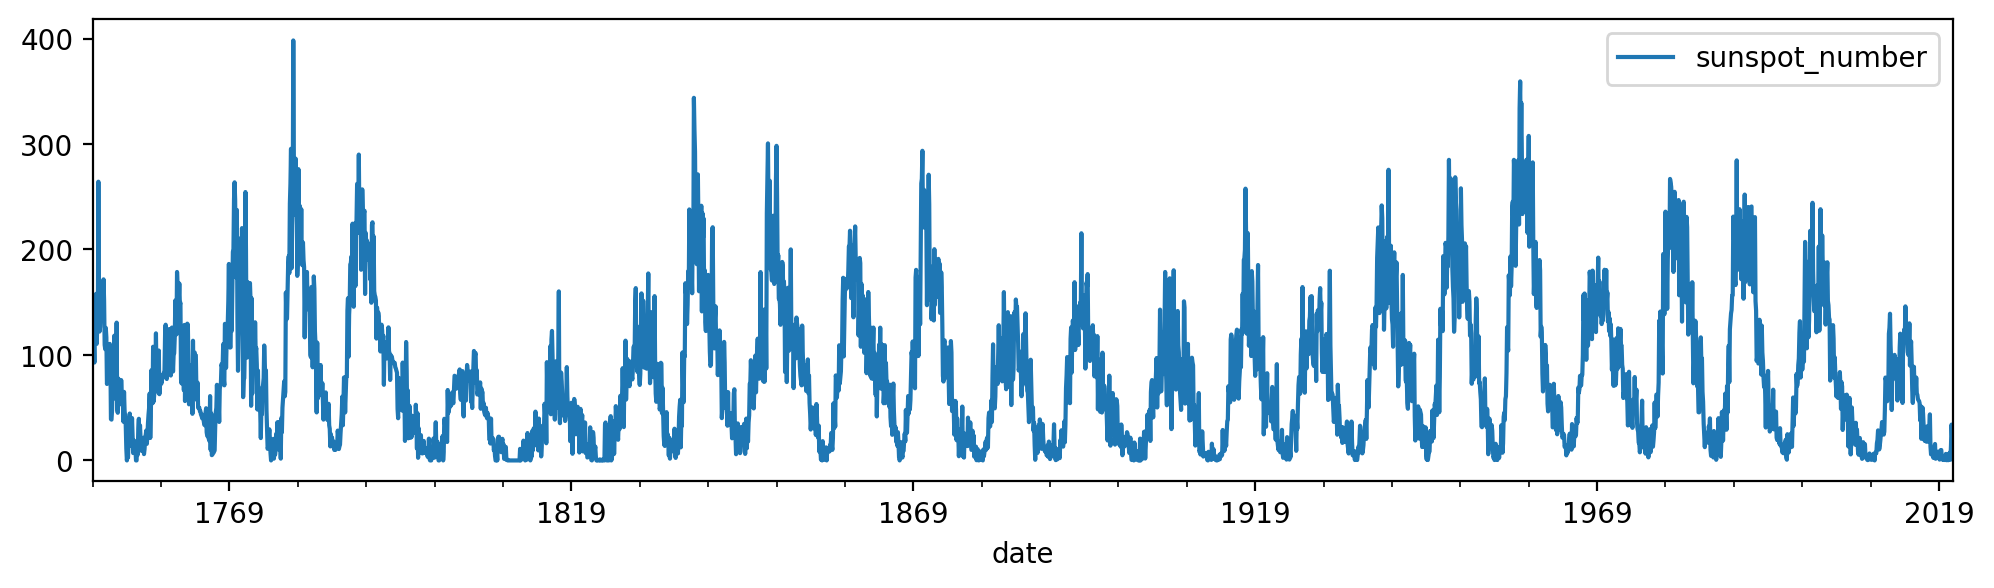

In [2]:
df = pd.read_parquet(DATA_DIR / "sunspots.parquet")
df["date"] = df["date"].dt.to_period('M')
df = df.set_index("date")

_, ax = plt.subplots(1,1, figsize=(12, 3))
_ = df.plot(ax=ax)
df.head()

<img src="../images/sunspot.gif" width="100">

## What is forecasting?
* Predicting future values of a time series through values and events in the past and present, e.g.

## Forecasting vs. supervised machine learning
#### Supervised learning &#x1F440; 
* We know the values of predictor variables &#x2705; 
* We assume that future data looks the same as past data &#x2705; 
#### Forecasting &#x1F4C8; 
* We often don't know the values of predictor variables &#x274C;
* Sometimes we don't even have predictors &#x274C;
* Time series are dynamic: distributions change! &#x274C;



## Forecasting modelling approach
```mermaid
graph TD
Z(Forecasting) --> A(Specialised<br/>models)
Z(Forecasting) --> B(Off-the-shelf<br/>algorithms)
A --> C(Exponential smoothing,<br/>ARIMA)
A --> D(Prophet)
A --> E(Recursive NNs)
A --> EE(...)
B --> F(Linear regression)
B --> G(Decision trees)
B --> H(...)
```

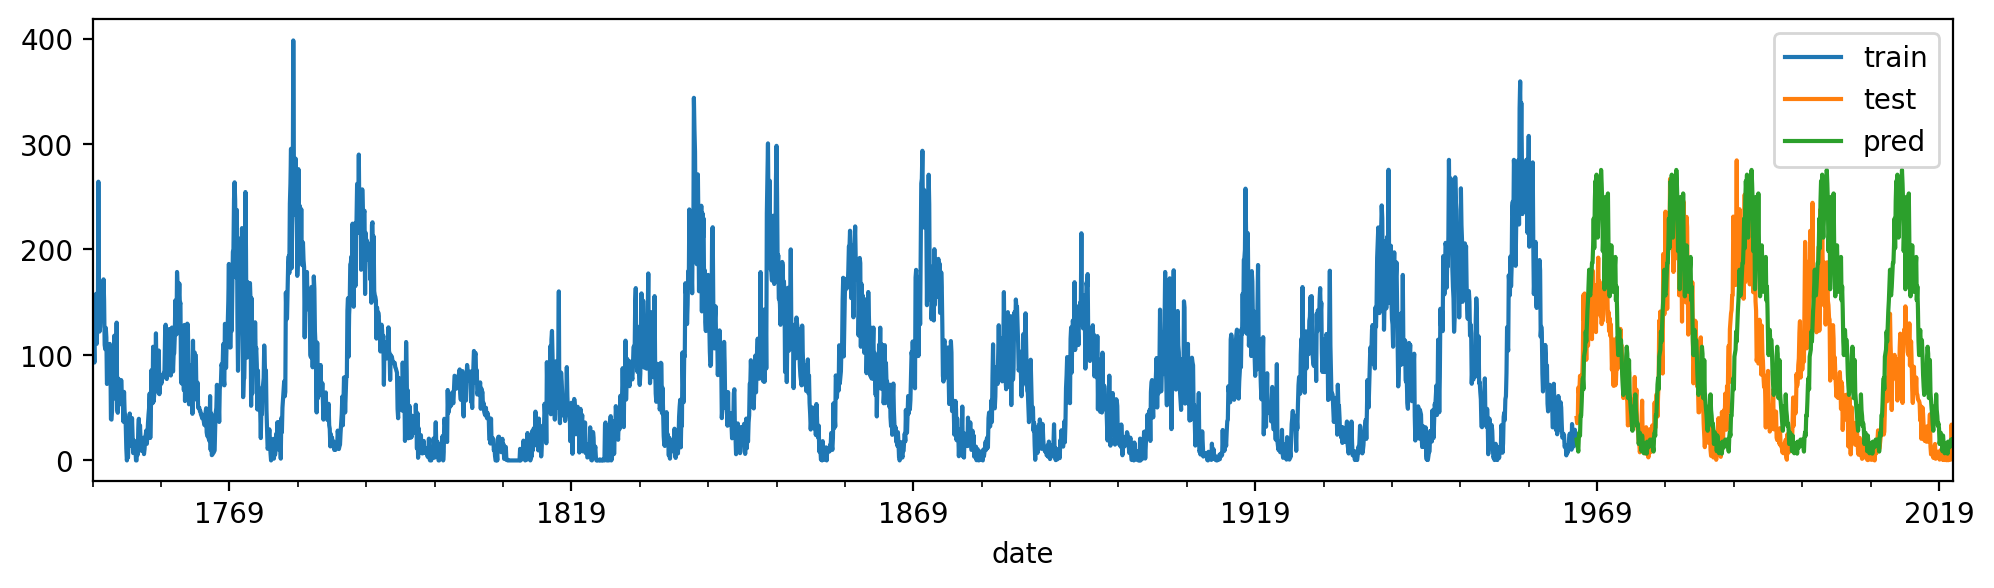

In [3]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.base import ForecastingHorizon

SPLIT_DATE = "1966-01-01"

df_train = df[df.index < SPLIT_DATE]
df_test = df[df.index >= SPLIT_DATE]

model = NaiveForecaster(strategy="mean",window_length=12*11*2, sp=12*11)
model.fit(df_train)

df_pred = model.predict(ForecastingHorizon(df_test.index, is_relative=False))

_, ax = plt.subplots(1,1, figsize=(12, 3))
_ = df_train.plot(ax=ax)
_ = df_test.plot(ax=ax)
_ = df_pred.plot(ax=ax)
_ = plt.legend(["train", "test", "pred"])